# **Non DL Model: SVM**

<ins>Group Members</ins>: Catrina Hacker, Yoonduk Kim, Mohit Bagri

This notebook contains the code for one of our non deep learning models. This model uses SVM to do ternary classification of images to assign labels of: 

*   0: no mask
*   1: correctly worn mask
*   2: incorrectly worn mask

Import libraries 

In [17]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import pandas as pd
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage.color import rgb2grey
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import cv2
import glob
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

Access to Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Building the Dataset

In [4]:
# Add "MASK WORN INCORRECTLY" Images to Dataset 
path = "/content/drive/My Drive/Final Project/data/img/c3-incorrect/*.*"

X=[]
y=[]

i=0

limit = 100

for file in glob.glob(path):
   img = cv2.imread(file)
   img = cv2.resize(img.astype(np.float32), (227,227),interpolation=cv2.INTER_CUBIC)
   a= img.flatten()
   X.append(a)
   y.append(2)
   i = i+1
   if i>limit:
     break

In [5]:
# Add "NO MASK WORN" Images to Dataset 

path = "/content/drive/My Drive/Final Project/data/img/c1-nomask/*.*"

i=0
for file in glob.glob(path):
   img = cv2.imread(file)
   img = cv2.resize(img.astype(np.float32), (227,227),interpolation=cv2.INTER_CUBIC)
   a= img.flatten()
   X.append(a)
   y.append(0)
   i = i+1
   if i>limit:
     break

In [7]:
# Add "MASK WORN CORRECTLY" Images to Dataset 

path = "/content/drive/My Drive/Final Project/data/img/c2-correct/*.*"

i=0
for file in glob.glob(path):
   img = cv2.imread(file)
   img = cv2.resize(img.astype(np.float32), (227,227),interpolation=cv2.INTER_CUBIC)
   a= img.flatten()
   X.append(a)
   y.append(1)
   i = i+1
   if i>limit:
     break

In [8]:
# Convert Data into DataFrame
df = pd.DataFrame(X)

In [9]:
# Impute Missing Values using Median 
for i in df.columns[df.isnull().any(axis=0)]:     #Applying Only on variables with NaN values
    df[i].fillna(df[i].median(),inplace=True)

Perform Dimensionality Reduction using PCA

In [10]:
pca = PCA(n_components=150)
X=pca.fit_transform(df)

Train Test Split of Dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=1234123)

Train SVM Classifier

In [12]:
svm = SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Prediction on Test Data 

In [13]:
y_pred = svm.predict(X_test)



Compute Performance Metrics

In [21]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='macro')
print('Model accuracy:', accuracy,'Model F1 score:', f1)

Model accuracy: 0.8083333333333333 Model F1 score: 0.7724581582245816


Create Confusion Matrix 

([<matplotlib.axis.YTick at 0x7efbee58dbd0>,
 [Text(0, 0.5, 'no mask'), Text(0, 1.5, 'correct'), Text(0, 2.5, 'incorrect')])

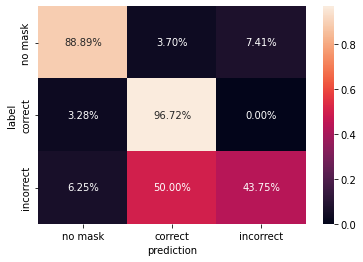

In [18]:
cm =  confusion_matrix(y_test, y_pred)
cm = cm/cm.sum(axis=1)[:,None]
sns.heatmap(cm, fmt='.2%',annot=True)
plt.ylabel('label')
plt.xlabel('prediction')
plt.xticks([0.5, 1.5, 2.5], ['no mask', 'correct', 'incorrect'])
plt.yticks([0.5, 1.5, 2.5], ['no mask', 'correct', 'incorrect'], verticalalignment='center')